In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,535 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('../content/sample_data/Variables for Clustering.csv', encoding='euc-kr')
df.head(100)

,이름,위도,경도
0,공항시장,37.563001,126.809101
1,까치산시장,37.531527,126.847865
2,남부골목시장,37.533143,126.860646
3,남부화곡시장,37.533066,126.858988
4,대원종합시장,37.544428,126.836465
5,송화골목시장,37.548727,126.835716
6,신월중앙시장,37.528053,126.842345
7,화곡본동시장,37.542868,126.844115
8,화곡중앙골목시장,37.535052,126.839317
9,화곡중앙시장,37.535339,126.839467


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


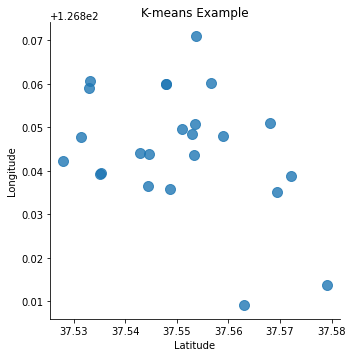

In [ ]:
sb.lmplot('위도', '경도', data=df, fit_reg=False, scatter_kws={"s": 100})

plt.title('K-means Example')
plt.xlabel('Latitude') # xlabel 이름을 위도
plt.ylabel('Longitude') # ylabel 이름을 경도
plt.show()

In [ ]:
# 데이터 프레임을 넘파이 객체로 초기화
points = df[['위도', '경도']].values

# 데이터 기반으로 K-means 알고리즘을 수행해 클러스터 4개 생성
kmeans = KMeans(n_clusters=4).fit(points)

# 각 클러스터들의 중심 위치를 구함
kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 37.55994209, 126.84565917],
       [ 37.53883939, 126.84113236],
       [ 37.54538949, 126.8617709 ],
       [ 37.57102563, 126.81145655]])

In [ ]:
# 각 데이터가 속한 클러스터를 확인
kmeans.labels_

array([3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 3, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       0, 0], dtype=int32)

In [ ]:
df['cluster'] = kmeans.labels_
df.head(100)

,이름,위도,경도,cluster
0,공항시장,37.563001,126.809101,3
1,까치산시장,37.531527,126.847865,1
2,남부골목시장,37.533143,126.860646,2
3,남부화곡시장,37.533066,126.858988,2
4,대원종합시장,37.544428,126.836465,1
5,송화골목시장,37.548727,126.835716,1
6,신월중앙시장,37.528053,126.842345,1
7,화곡본동시장,37.542868,126.844115,1
8,화곡중앙골목시장,37.535052,126.839317,1
9,화곡중앙시장,37.535339,126.839467,1


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing f

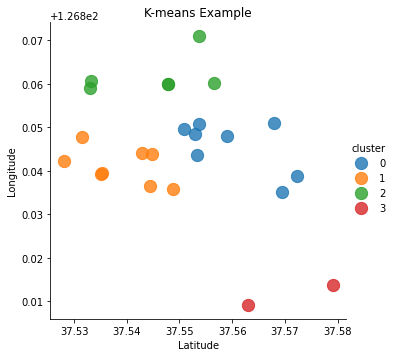

In [ ]:
# 최종적으로 클러스터링이 완료된 결과를 출력
sb.lmplot('위도', '경도', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")

plt.title('K-means Example')
plt.xlabel('Latitude') # xlabel 이름을 위도
plt.ylabel('Longitude') # ylabel 이름을 경도
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


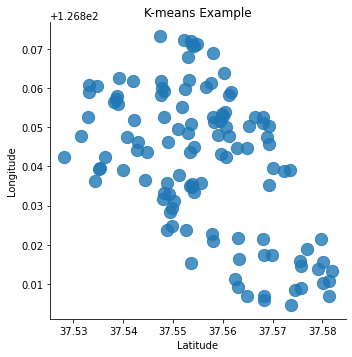

In [ ]:
# 최종 (가중치 포함 x)
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../content/sample_data/Variables for Clustering.csv', encoding='euc-kr')
# df.head(300)

sb.lmplot(x='위도', y='경도', data=df, fit_reg=False, scatter_kws={"s": 150})

plt.title('K-means Example')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/ut

[[ 37.55955821 126.85723077]
 [ 37.57843376 126.81622057]
 [ 37.5507294  126.83364431]
 [ 37.53694159 126.85843271]
 [ 37.5713027  126.83813845]
 [ 37.54960257 126.8585463 ]
 [ 37.565386   126.80794374]
 [ 37.5344051  126.84099254]
 [ 37.55338597 126.87094486]
 [ 37.55348972 126.8218744 ]
 [ 37.55745893 126.84738511]
 [ 37.56750696 126.84933419]
 [ 37.56649677 126.81883106]
 [ 37.57780616 126.80828213]
 [ 37.5437755  126.84658355]]


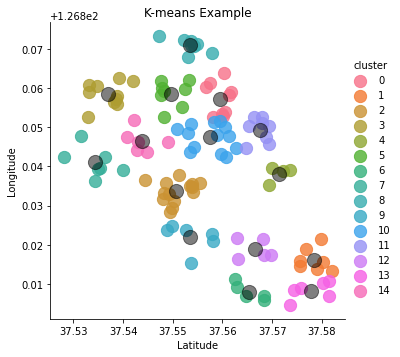

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing fr

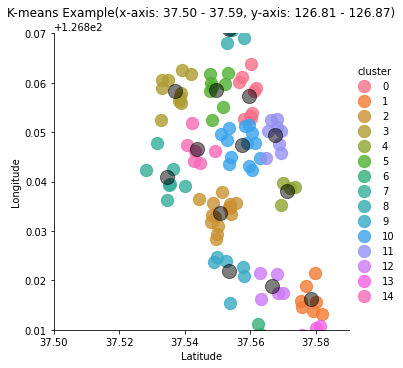

In [ ]:
# 최종 (가중치 포함 x)
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../content/sample_data/Variables for Clustering.csv', encoding='euc-kr')
# df.head(300)

# 데이터 프레임을 넘파이 객체로 초기화
points = df[['위도', '경도']].values

# 데이터 기반으로 K-means 알고리즘을 수행해 클러스터 n_clusters개 생성
kmeans = KMeans(n_clusters=15).fit(points)

df['cluster'] = kmeans.labels_
# df.head(300)

# 최종적으로 클러스터링이 완료된 결과를 출력
sb.lmplot(x='위도', y='경도', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")

# 클러스터링 결과를 통해 얻은 중심점 좌표 시각화
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title('K-means Example')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# 여기서 부턴 특정 X축과 Y축의 범위에서의 시각화 결과를 도출하는 코드
p = sb.lmplot(x='위도', y='경도', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")

# 클러스터링 결과를 통해 얻은 중심점 좌표 시각화
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title('K-means Example(x-axis: 37.50 - 37.59, y-axis: 126.81 - 126.87)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.xlim(37.50, 37.59)
plt.ylim(126.81, 126.87)

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/ut

[[ 37.55937373 126.80353985]
 [ 37.56157208 126.85034614]
 [ 37.53147049 126.84665279]
 [ 37.56610373 126.82753113]
 [ 37.54913516 126.86811297]
 [ 37.54912881 126.83168093]
 [ 37.5777619  126.81342315]
 [ 37.55015767 126.81503417]
 [ 37.53765535 126.8578769 ]
 [ 37.56799666 126.84189662]
 [ 37.55246529 126.84895452]
 [ 37.53918352 126.84063534]
 [ 37.58208346 126.79829425]
 [ 37.55929528 126.83941651]
 [ 37.5574033  126.86260173]
 [ 37.55758485 126.80866417]
 [ 37.55634606 126.76903555]
 [ 37.55820958 126.821245  ]
 [ 37.55091413 126.8723438 ]
 [ 37.53207113 126.85826366]
 [ 37.54211298 126.84829918]
 [ 37.56678477 126.81226925]
 [ 37.5639846  126.85349749]
 [ 37.538215   126.7976788 ]
 [ 37.59051958 126.80225453]
 [ 37.57374337 126.81746932]
 [ 37.55308738 126.82492664]
 [ 37.57550745 126.83719593]
 [ 37.5383646  126.83600133]
 [ 37.53626372 126.85413381]
 [ 37.57378155 126.80349267]
 [ 37.56864318 126.82251692]
 [ 37.55417417 126.87075559]
 [ 37.56419204 126.80075556]
 [ 37.55268098

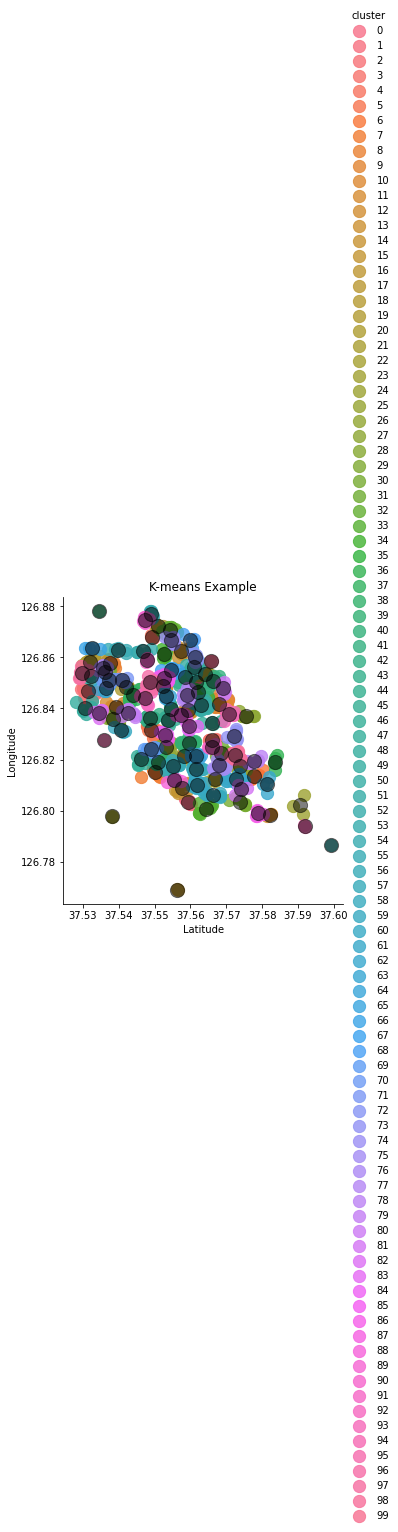

In [ ]:
# 최종 (버스 정류장 포함)
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../content/sample_data/Variables for Clustering ver2.csv', encoding='euc-kr')
# df.head(300)

# 데이터 프레임을 넘파이 객체로 초기화
points = df[['위도', '경도']].values

# 데이터 기반으로 K-means 알고리즘을 수행해 클러스터 n_clusters개 생성
kmeans = KMeans(n_clusters=100).fit(points)

df['cluster'] = kmeans.labels_
# df.head(300)

# 최종적으로 클러스터링이 완료된 결과를 출력
sb.lmplot(x='위도', y='경도', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")

# 클러스터링 결과를 통해 얻은 중심점 좌표 시각화
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title('K-means Example')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/ut

[[ 37.55923003 126.84062848]
 [ 37.53505696 126.85504314]
 [ 37.5833352  126.79909054]
 [ 37.55074591 126.81634772]
 [ 37.54864799 126.84910873]
 [ 37.56778529 126.82215856]
 [ 37.53704466 126.84040283]
 [ 37.56152524 126.85293942]
 [ 37.55534547 126.82508592]
 [ 37.55241813 126.86856431]
 [ 37.5625455  126.80719417]
 [ 37.57010503 126.83959316]
 [ 37.54919737 126.83464168]
 [ 37.55634606 126.76903555]
 [ 37.57579666 126.81417176]]


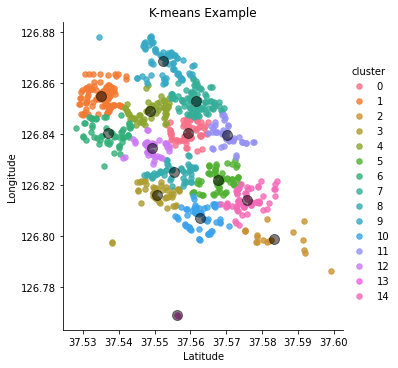

In [ ]:
# 최종 (버스 정류장 포함)
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../content/sample_data/Variables for Clustering ver2.csv', encoding='euc-kr')
# df.head(300)

# 데이터 프레임을 넘파이 객체로 초기화
points = df[['위도', '경도']].values

# 데이터 기반으로 K-means 알고리즘을 수행해 클러스터 n_clusters개 생성
kmeans = KMeans(n_clusters=15).fit(points)

df['cluster'] = kmeans.labels_
# df.head(300)

# 최종적으로 클러스터링이 완료된 결과를 출력
sb.lmplot(x='위도', y='경도', data=df, fit_reg=False, scatter_kws={"s": 30}, hue="cluster")

# 클러스터링 결과를 통해 얻은 중심점 좌표 시각화
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

plt.title('K-means Example')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()